## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석'

## 과제
* 데이터 구조, 분포 확인, 전처리 : 1.버스정류장데이터 / 2.유동인구데이터 / 3.주민등록데이터 / 4.업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 5.데이터 분석

---

## 데이터 정보

|구분||
|-|-|
|파일명|**(3) 생활이동_자치구_2022.04_00시.csv ~ 생활이동_자치구_2022.04_23시.csv**|
|출처|https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do|
|설명|서울시 생활이동 인구 데이터 (2022년 4월 0시~23시 통합)|
||이동 유형은 H(야간상주지), W(주간상주지), E(기타 지역)를 의미<br>예) HW : 야간상주지에서 주간상주지로 이동|

*  해석  
22년 4월 일요일에  
종로구(11010) 기타 지역(E)에서 종로구(11010) 기타 지역(E)으로 이동한  
0~10세 여성은 평균 10분 이동하여 0~0:59 사이에 도착했고  
총 28.02명이다.

|구분||
|-|-|
|파일명|**(4) adm_code.xls**|
|출처|https://sgis.kostat.go.kr/view/newhelp/dd_help_20_0|
|설명|통계청의 행정구역코드(2022년 6월, SGIS 행정구역코드)|
||행정안전부와 통계청의 코드가 다름. ex)종로구 11110<->11010)|

---

## 1.데이터 불러오기 및 합치기

In [1]:
import pandas as pd

path3_a = './data/(3) 생활이동_자치구_202204/생활이동_자치구_2022.04_'
path3_b = ['0' + str(x) for x in range(0, 10)] + [str(x) for x in range(10, 24)]
path3_c = '시.csv'

In [2]:
isFirst = True
for pb in path3_b:
    path3 = path3_a + pb + path3_c
    if isFirst:
        moving = pd.read_csv(path3, encoding='cp949')
        isFirst = False
    else:
        mv = pd.read_csv(path3, encoding='cp949')
        moving = pd.concat([moving, mv], axis=0, ignore_index=True)

moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


---

## 2.기본 정보 확인 및 클렌징

In [4]:
# 기초 통계량
moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [5]:
# 데이터 타입, 결측값 갯수
moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923054 entries, 0 to 28923053
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.2+ GB


### 2-1.결측치 처리 (NaN이 아닌 결측치 처리)

* 이동인구(합) column이 개인정보 비식별화를 위해 3명 미만의 경우 *로 처리되어 있다.

In [6]:
moving['이동인구(합)'].value_counts().to_frame()

,이동인구(합)
*,3842041
3.3,399374
6.05,366830
3.29,289731
3.31,232069
...,...
2352.37,1
1617.99,1
3141.86,1
1485.54,1


In [7]:
moving.loc[moving['이동인구(합)'] == '*', '이동인구(합)'] = 1.5 # 1명과 2명의 중앙값
moving['이동인구(합)'] = moving['이동인구(합)'].astype(float)

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
moving.loc[moving['이동인구(합)'] == 1.5]

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
25,202204,일,0,11010,11010,F,25,HW,10,1.5
159,202204,일,0,11010,11010,M,40,HW,20,1.5
222,202204,일,0,11010,11020,F,20,HE,20,1.5
224,202204,일,0,11010,11020,F,20,EW,20,1.5
225,202204,일,0,11010,11020,F,20,WW,10,1.5
...,...,...,...,...,...,...,...,...,...,...
28923016,202204,토,23,39000,11240,M,20,EW,60,1.5
28923017,202204,토,23,39000,11240,M,20,EE,70,1.5
28923030,202204,토,23,39000,11250,F,20,EE,80,1.5
28923032,202204,토,23,39000,11250,F,30,EE,70,1.5


#### Q) 이동유형, 요일, 성별 각 변수의 수?

In [10]:
moving['이동유형'].value_counts().to_frame()

,이동유형
EH,5757073
HE,5520005
EE,5085099
WH,3108026
WE,2809148
HW,2695189
EW,2304535
WW,1026134
HH,617845


In [11]:
# 22년 4월은 금토가 5회, 나머지 요일은 4회
moving['요일'].value_counts().to_frame()

,요일
토,4690806
금,4641881
목,4011291
수,3955646
화,3926876
월,3906272
일,3790282


In [12]:
moving['성별'].value_counts().to_frame()

,성별
M,16355029
F,12568025


#### Q) 심야 이동(0:00~4:59)이 가장 많은 요일?

In [20]:
seoulnight = moving.loc[moving['도착시간'] < 5]
seoulnight.groupby('요일', as_index=False)['이동인구(합)'].sum().sort_values(by='이동인구(합)', ascending=False)

,요일,이동인구(합)
5,토,5233200.14
0,금,4206523.57
4,일,3550710.46
1,목,3311174.58
2,수,3203277.45
6,화,3035154.60
3,월,2511032.17


### 2-2.서울시 데이터 선택
* 출입이 서울시 이외인 데이터 제거

In [21]:
seoul_moving = moving.loc[(moving['출발 시군구 코드'] < 20000) & (moving['도착 시군구 코드'] < 20000)]
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


### *데이터불러오기2

In [22]:
seoul_code = pd.read_excel('./data/(4) adm_code.xls', sheet_name='2022년6월', header=1, dtype={'시도코드':str, '시군구코드':str})
seoul_code.head(2)

,시도코드,시도명칭,시군구코드,시군구명칭,읍면동코드,읍면동명칭
0,11,서울특별시,010,종로구,530,사직동
1,11,서울특별시,010,종로구,540,삼청동


In [23]:
seoul_code = seoul_code.drop(columns=['읍면동코드', '읍면동명칭'], axis=1).drop_duplicates()
seoul_code = seoul_code.loc[seoul_code['시도명칭'] == '서울특별시'].drop(columns='시도명칭', axis=1).rename(columns={'시군구코드':'bcode'})
seoul_code['시군구코드'] = (seoul_code['시도코드'] + seoul_code['bcode']).astype(int)
seoul_code = seoul_code.loc[:, ['시군구명칭', '시군구코드']].sort_values(by='시군구명칭').reset_index(drop=True)
seoul_code.head()

,시군구명칭,시군구코드
0,강남구,11230
1,강동구,11250
2,강북구,11090
3,강서구,11160
4,관악구,11210


In [27]:
seoul_moving2 = pd.merge(seoul_moving, seoul_code, left_on='출발 시군구 코드', right_on='시군구코드', how='inner')
seoul_moving2 = seoul_moving2.rename(columns={'시군구명칭':'출발시군구'}).drop(columns=['출발 시군구 코드', '시군구코드'], axis=1)
seoul_moving2 = pd.merge(seoul_moving2, seoul_code, left_on='도착 시군구 코드', right_on='시군구코드', how='inner')
seoul_moving2 = seoul_moving2.rename(columns={'시군구명칭':'도착시군구'}).drop(columns=['도착 시군구 코드', '시군구코드'], axis=1)
seoul_moving2.head(2)

,대상연월,요일,도착시간,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발시군구,도착시군구
0,202204,일,0,F,0,EE,10,28.02,종로구,종로구
1,202204,일,0,F,0,EH,10,27.52,종로구,종로구


#### Q) 유동인구 기준 유출이 가장 많은 구?

In [29]:
seoul_moving2.groupby('출발시군구', as_index=False)['이동인구(합)'].sum().sort_values(by='이동인구(합)', ascending=False).head(3)

,출발시군구,이동인구(합)
0,강남구,46220924.63
17,송파구,36207933.02
14,서초구,29698071.20


#### Q) 유동인구 기준 유출이 가장 적은 구?

In [30]:
seoul_moving2.groupby('출발시군구', as_index=False)['이동인구(합)'].sum().sort_values(by='이동인구(합)', ascending=True).head(3)

,출발시군구,이동인구(합)
7,금천구,8467440.48
9,도봉구,11253816.27
2,강북구,13084060.28


#### Q) 유동인구 기준 유입이 가장 많은 구?

In [31]:
seoul_moving2.groupby('도착시군구', as_index=False)['이동인구(합)'].sum().sort_values(by='이동인구(합)', ascending=False).head(3)

,도착시군구,이동인구(합)
0,강남구,46152613.4
17,송파구,36156898.5
14,서초구,29763430.8


#### Q) 유동인구 기준 유입이 가장 적은 구?

In [32]:
seoul_moving2.groupby('도착시군구', as_index=False)['이동인구(합)'].sum().sort_values(by='이동인구(합)', ascending=True).head(3)

,도착시군구,이동인구(합)
7,금천구,8452662.47
9,도봉구,11243990.02
2,강북구,13079023.71


### 2-3.'도착시군구' 기준 각 구별로 '평균 이동 시간(분)', '이동인구(합)' 의 평균과 합

In [33]:
seoul_moving2

,대상연월,요일,도착시간,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발시군구,도착시군구
0,202204,일,0,F,0,EE,10,28.02,종로구,종로구
1,202204,일,0,F,0,EH,10,27.52,종로구,종로구
2,202204,일,0,F,0,HE,10,27.83,종로구,종로구
3,202204,일,0,F,10,HW,10,6.05,종로구,종로구
4,202204,일,0,F,10,EH,90,5.95,종로구,종로구
...,...,...,...,...,...,...,...,...,...,...
10655890,202204,토,23,M,80,WH,10,85.10,강동구,강동구
10655891,202204,토,23,M,80,EH,10,28.36,강동구,강동구
10655892,202204,토,23,M,80,EE,20,37.99,강동구,강동구
10655893,202204,토,23,M,80,HE,10,9.42,강동구,강동구


In [50]:
# seoul_moving = seoul_moving2.groupby(['도착시군구'], as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].agg({
#     '평균 이동 시간(분)':['mean', 'sum'],
#     '이동인구(합)':['mean', 'sum']
# })
seoul_arr1 = seoul_moving2.groupby(['도착시군구'], as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].mean().round(2)
seoul_arr1.columns = ['지역구', '평균이동시간(분)', '평균이동인구(명)']
seoul_arr2 = seoul_moving2.groupby(['도착시군구'], as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].sum().round(0)
seoul_arr2.columns = ['지역구', '총이동시간', '총이동인구']

seoul_moving = pd.merge(seoul_arr1, seoul_arr2, how='inner', on='지역구')
seoul_moving = seoul_moving[['지역구', '평균이동시간(분)', '총이동시간', '평균이동인구(명)', '총이동인구']]
seoul_moving['총이동인구'] = seoul_moving['총이동인구'].astype(int)
seoul_moving.head()

,지역구,평균이동시간(분),총이동시간,평균이동인구(명),총이동인구
0,강남구,23.28,12904380,83.28,46152613
1,강동구,26.11,9596980,59.84,21996357
2,강북구,24.28,8765160,36.23,13079024
3,강서구,25.50,10718780,54.17,22770901
4,관악구,23.84,10091730,46.54,19700285


In [51]:
# 파일 저장
seoul_moving.to_csv('df2_seoul_moving.csv', index=False)

---

## 3.데이터 분석하기
* 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.

  - 데이터들의 패턴 탐색
  - 변수들간의 관계 파악

In [44]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic")
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, style='darkgrid') # 음수 부호 깨짐 현상 방지, 그래프 배경색

# scipy
import scipy.stats as spst

In [45]:
sns.set_palette('coolwarm', seoul_moving['지역구'].nunique())

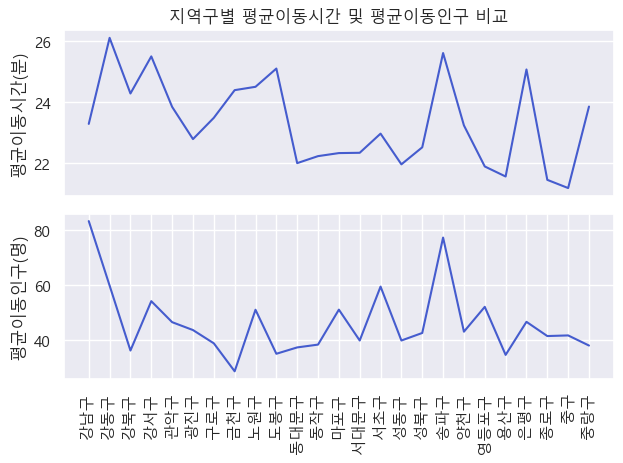

In [57]:
plt.subplot(2, 1, 1)
plt.title('지역구별 평균이동시간 및 평균이동인구 비교')
plt.plot(seoul_moving['지역구'], seoul_moving['평균이동시간(분)'])
plt.gca().xaxis.convert_units = lambda x: x
plt.xticks([])
plt.ylabel('평균이동시간(분)')

plt.subplot(2, 1, 2)
plt.plot(seoul_moving['지역구'], seoul_moving['평균이동인구(명)'])
plt.xticks(rotation=90)
plt.ylabel('평균이동인구(명)')

plt.tight_layout()
plt.show()

---